In [ ]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from infrastructure.utils import calculate_coeffs, calculate_loss_function, plot_decoding
from infrastructure.DelayNetwork import DelayNetwork
import nengo
import numpy as np

In [2]:
np.random.seed(42)
dt=0.001
run_time = 10.0
readout_synapse = 0.05
inp_high = 10
neuron_type = nengo.AdaptiveLIF(tau_n=0.5, inc_n=0.01)
delay_mode = "discrete"
n_neurons = 300

In [3]:
with nengo.Network(seed=10) as model:
    white_signal = nengo.processes.WhiteSignal(period=run_time, high=10, rms=0.25, seed=121)
    input_node = nengo.Node(white_signal, size_out=1)
    delay_network = DelayNetwork(num_neurons=n_neurons, readout_synapse=readout_synapse, neuron_type=neuron_type, delay_mode=delay_mode)
    nengo.Connection(input_node, delay_network.ens, synapse=None)

    p_input = nengo.Probe(input_node, sample_every=dt)
    p_activity = nengo.Probe(delay_network.ens.neurons, synapse=readout_synapse, sample_every=dt)
    p_delay_activity = nengo.Probe(delay_network.readout, synapse=None, sample_every=dt)

with nengo.Simulator(model) as sim:
    sim.run(run_time)

delay_coeffs = calculate_coeffs(sim.data[p_delay_activity], sim.data[p_input])
ls_coeffs = calculate_coeffs(sim.data[p_activity], sim.data[p_input])

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

## Training

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

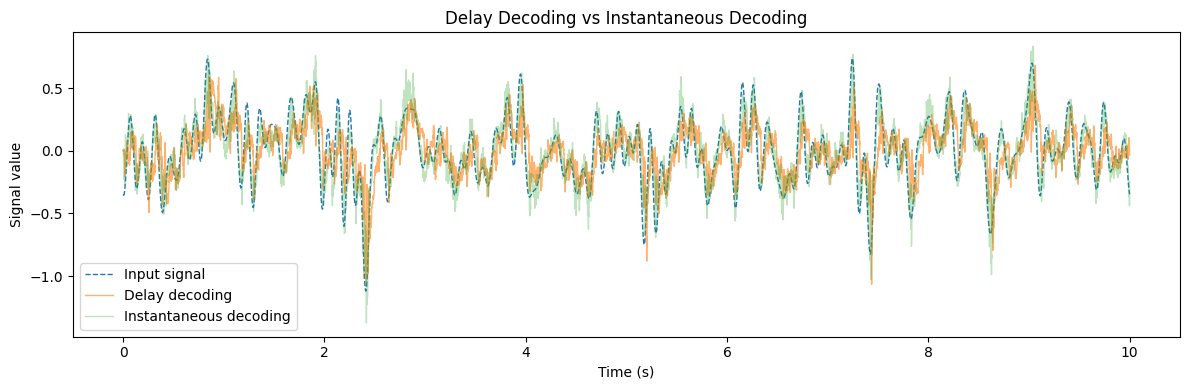

Delay Decoding Loss:  0.04541976963644187
Instantaneous Decoding Loss:  0.01177577873738147


In [4]:
with nengo.Network(seed=10) as model:
    white_signal = nengo.processes.WhiteSignal(period=run_time, high=10, rms=0.25, seed=121)
    input_node = nengo.Node(white_signal, size_out=1)
    delay_network = DelayNetwork(num_neurons=n_neurons, decoder_weights=delay_coeffs, readout_synapse=readout_synapse, neuron_type=neuron_type, delay_mode=delay_mode)
    nengo.Connection(input_node, delay_network.ens, synapse=None)

    p_input = nengo.Probe(input_node, sample_every=dt)
    p_delay_decoded = nengo.Probe(delay_network.readout, synapse=None, sample_every=dt)
    p_activity = nengo.Probe(delay_network.ens.neurons, synapse=readout_synapse, sample_every=dt)

with nengo.Simulator(model) as sim:
    sim.run(run_time)

instantaneous_decoded = sim.data[p_activity] @ ls_coeffs

plot_decoding(sim.trange(), sim.data[p_input], sim.data[p_delay_decoded], instantaneous_decoded, 'Delay Decoding vs Instantaneous Decoding')
print('Delay Decoding Loss: ', calculate_loss_function(sim.data[p_input], sim.data[p_delay_decoded]))
print('Instantaneous Decoding Loss: ', calculate_loss_function(sim.data[p_input], instantaneous_decoded))

## Testing on unseen input

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

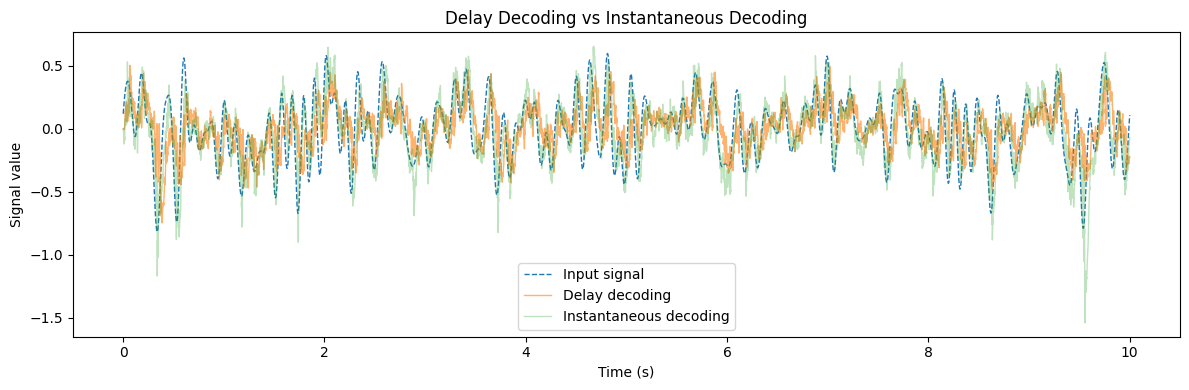

Delay Decoding Loss:  0.058828882468681516
Instantaneous Decoding Loss:  0.02701358469414884


In [5]:
with nengo.Network(seed=10) as model:
    white_signal = nengo.processes.WhiteSignal(period=run_time, high=10, rms=0.25, seed=223)
    input_node = nengo.Node(white_signal, size_out=1)
    delay_network = DelayNetwork(num_neurons=n_neurons, decoder_weights=delay_coeffs, readout_synapse=readout_synapse, neuron_type=neuron_type, delay_mode=delay_mode)
    nengo.Connection(input_node, delay_network.ens, synapse=None)

    p_input = nengo.Probe(input_node, sample_every=dt)
    p_delay_decoded = nengo.Probe(delay_network.readout, synapse=None, sample_every=dt)
    p_activity = nengo.Probe(delay_network.ens.neurons, synapse=readout_synapse, sample_every=dt)

with nengo.Simulator(model) as sim:
    sim.run(run_time)

instantaneous_decoded = sim.data[p_activity] @ ls_coeffs

plot_decoding(sim.trange(), sim.data[p_input], sim.data[p_delay_decoded], instantaneous_decoded,  'Delay Decoding vs Instantaneous Decoding')
print('Delay Decoding Loss: ', calculate_loss_function(sim.data[p_input], sim.data[p_delay_decoded]))
print('Instantaneous Decoding Loss: ', calculate_loss_function(sim.data[p_input], instantaneous_decoded))